<a href="https://colab.research.google.com/github/Shorna-2019331049/Skill_Morph/blob/main/Assignment6_Introduction_To_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Question 1: Find the Best Tree Depth
# Task: Test depths 3, 4, 5 and find highest accuracy
# Optional: Feature: 10; test depths 5,6,7,8,9

# Question 2: Calculate All Metrics
# Task: Use best depth to calculate precision, recall, F1-score

# Question 3: Test on New Patients

# Question 4: Analyze Confusion Matrix

## Load dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/skill_morph/Breast_Cancer_Wisconsin_Dataset.csv")
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [5]:
cols = df.columns.tolist()
print(cols)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [6]:
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [7]:
df['diagnosis_numeric'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_numeric
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1


In [8]:
features = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
            'concavity_mean','symmetry_mean','fractal_dimension_mean','smoothness_se']

x = df[features]
y = df['diagnosis_numeric']
print(x.shape)
print(y.shape)

(569, 10)
(569,)


In [9]:
x.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,smoothness_se
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,0.006399
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,0.005225


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 10)
(114, 10)
(455,)
(114,)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
mx_acc = 0.0
best_depth = 3

for i in range(3,10):
  model = DecisionTreeClassifier(max_depth=i, random_state=42)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)*100
  print(f"Accuracy for depth {i}: {accuracy:.2f}%")
  if accuracy > mx_acc:
    mx_acc = accuracy
    best_depth = i

print(f"Best depth: {best_depth}")

Accuracy for depth 3: 93.86%
Accuracy for depth 4: 94.74%
Accuracy for depth 5: 96.49%
Accuracy for depth 6: 93.86%
Accuracy for depth 7: 93.86%
Accuracy for depth 8: 93.86%
Accuracy for depth 9: 94.74%
Best depth: 5


In [13]:
model = DecisionTreeClassifier(max_depth=best_depth,random_state=42)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

precision = precision_score(y_test,y_pred)
print(f"Precision: {precision*100:.2f}%")

recall = recall_score(y_test,y_pred)
print(f"Recall: {recall*100:.2f}%")

f1 = f1_score(y_test,y_pred)
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 96.49%
Precision: 95.35%
Recall: 95.35%
F1 Score: 95.35%


[[69  2]
 [ 2 41]]


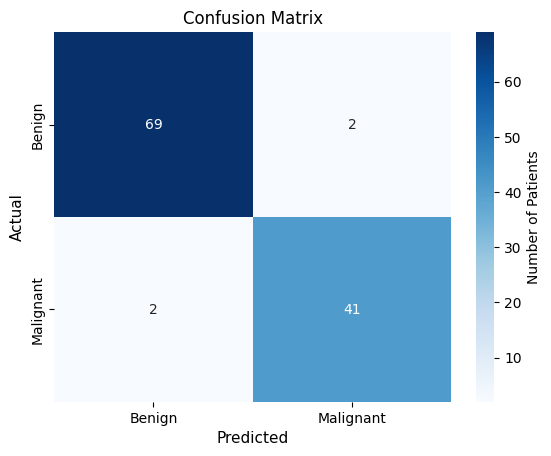

In [14]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

plt.plot()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.show()